# TASK 1: TITANTIC SURVIVAL PREDICTION

## Introduction:

The Titanic Survival Prediction task involves training a machine learning model to predict whether a passenger survived the Titanic disaster based on various features such as age, gender, ticket class, and fare. The goal is to utilize machine learning techniques to build a model that can accurately predict the survival of passengers.

In this context, the Scikit-learn library is used as a primary tool to handle data preprocessing, model training, and evaluation.

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

## Data Loading

In [160]:
data = pd.read_csv("Titanic-Dataset.csv")

## Data Analysis

In [161]:
# Display the first few entries in the dataset
data.head()

# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Exploration

In [162]:
data.shape          # Defines the shape of the dataset
data.isnull().sum() # Checks the number of missing values in each column
data.columns        # Defines columns in the dataset
data.tail(6)        # Gives information for the last 6 entries
data.describe()     # Describes the dataset
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Data Preprocessing

In [163]:
# Handling Missing Values
data['Age'].fillna(data['Age'].median(), inplace=True)  # Fill missing values in Age with the median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Fill missing values in Embarked with the mode
data.drop(columns=['Cabin'], inplace=True)  # Drop the Cabin column due to many missing values

# Encoding Categorical Variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drop unnecessary columns
data = data.drop(columns=['Name', 'Ticket', 'PassengerId'])

## Data Exploration (Continued)

In [164]:
# Training Dataset
print("Maximum Fare: ", data['Fare'].max())
print("Minimum Fare: ", data['Fare'].min())
print("Maximum Age: ", data['Age'].max())
print("Minimum Age: ", data['Age'].min())

spec = data.groupby("Survived")
spec.count()

Maximum Fare:  512.3292
Minimum Fare:  0.0
Maximum Age:  80.0
Minimum Age:  0.42


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,549,549,549,549,549,549,549
1,342,342,342,342,342,342,342


## Data Visualization

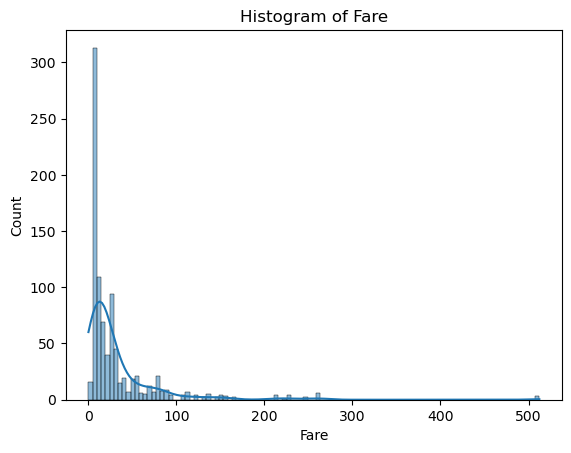

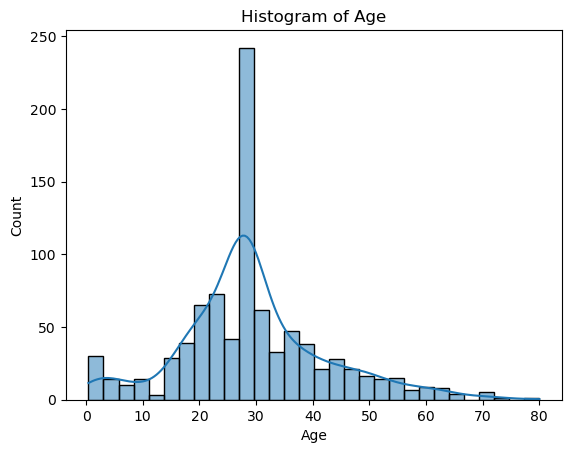

In [165]:
# Histogram for Titanic Dataset
sb.histplot(data=data, x='Fare', kde=True)
plt.title('Histogram of Fare')
plt.show()

sb.histplot(data=data, x='Age', kde=True)
plt.title('Histogram of Age')
plt.show()

### PairPlot for Titanic Dataset

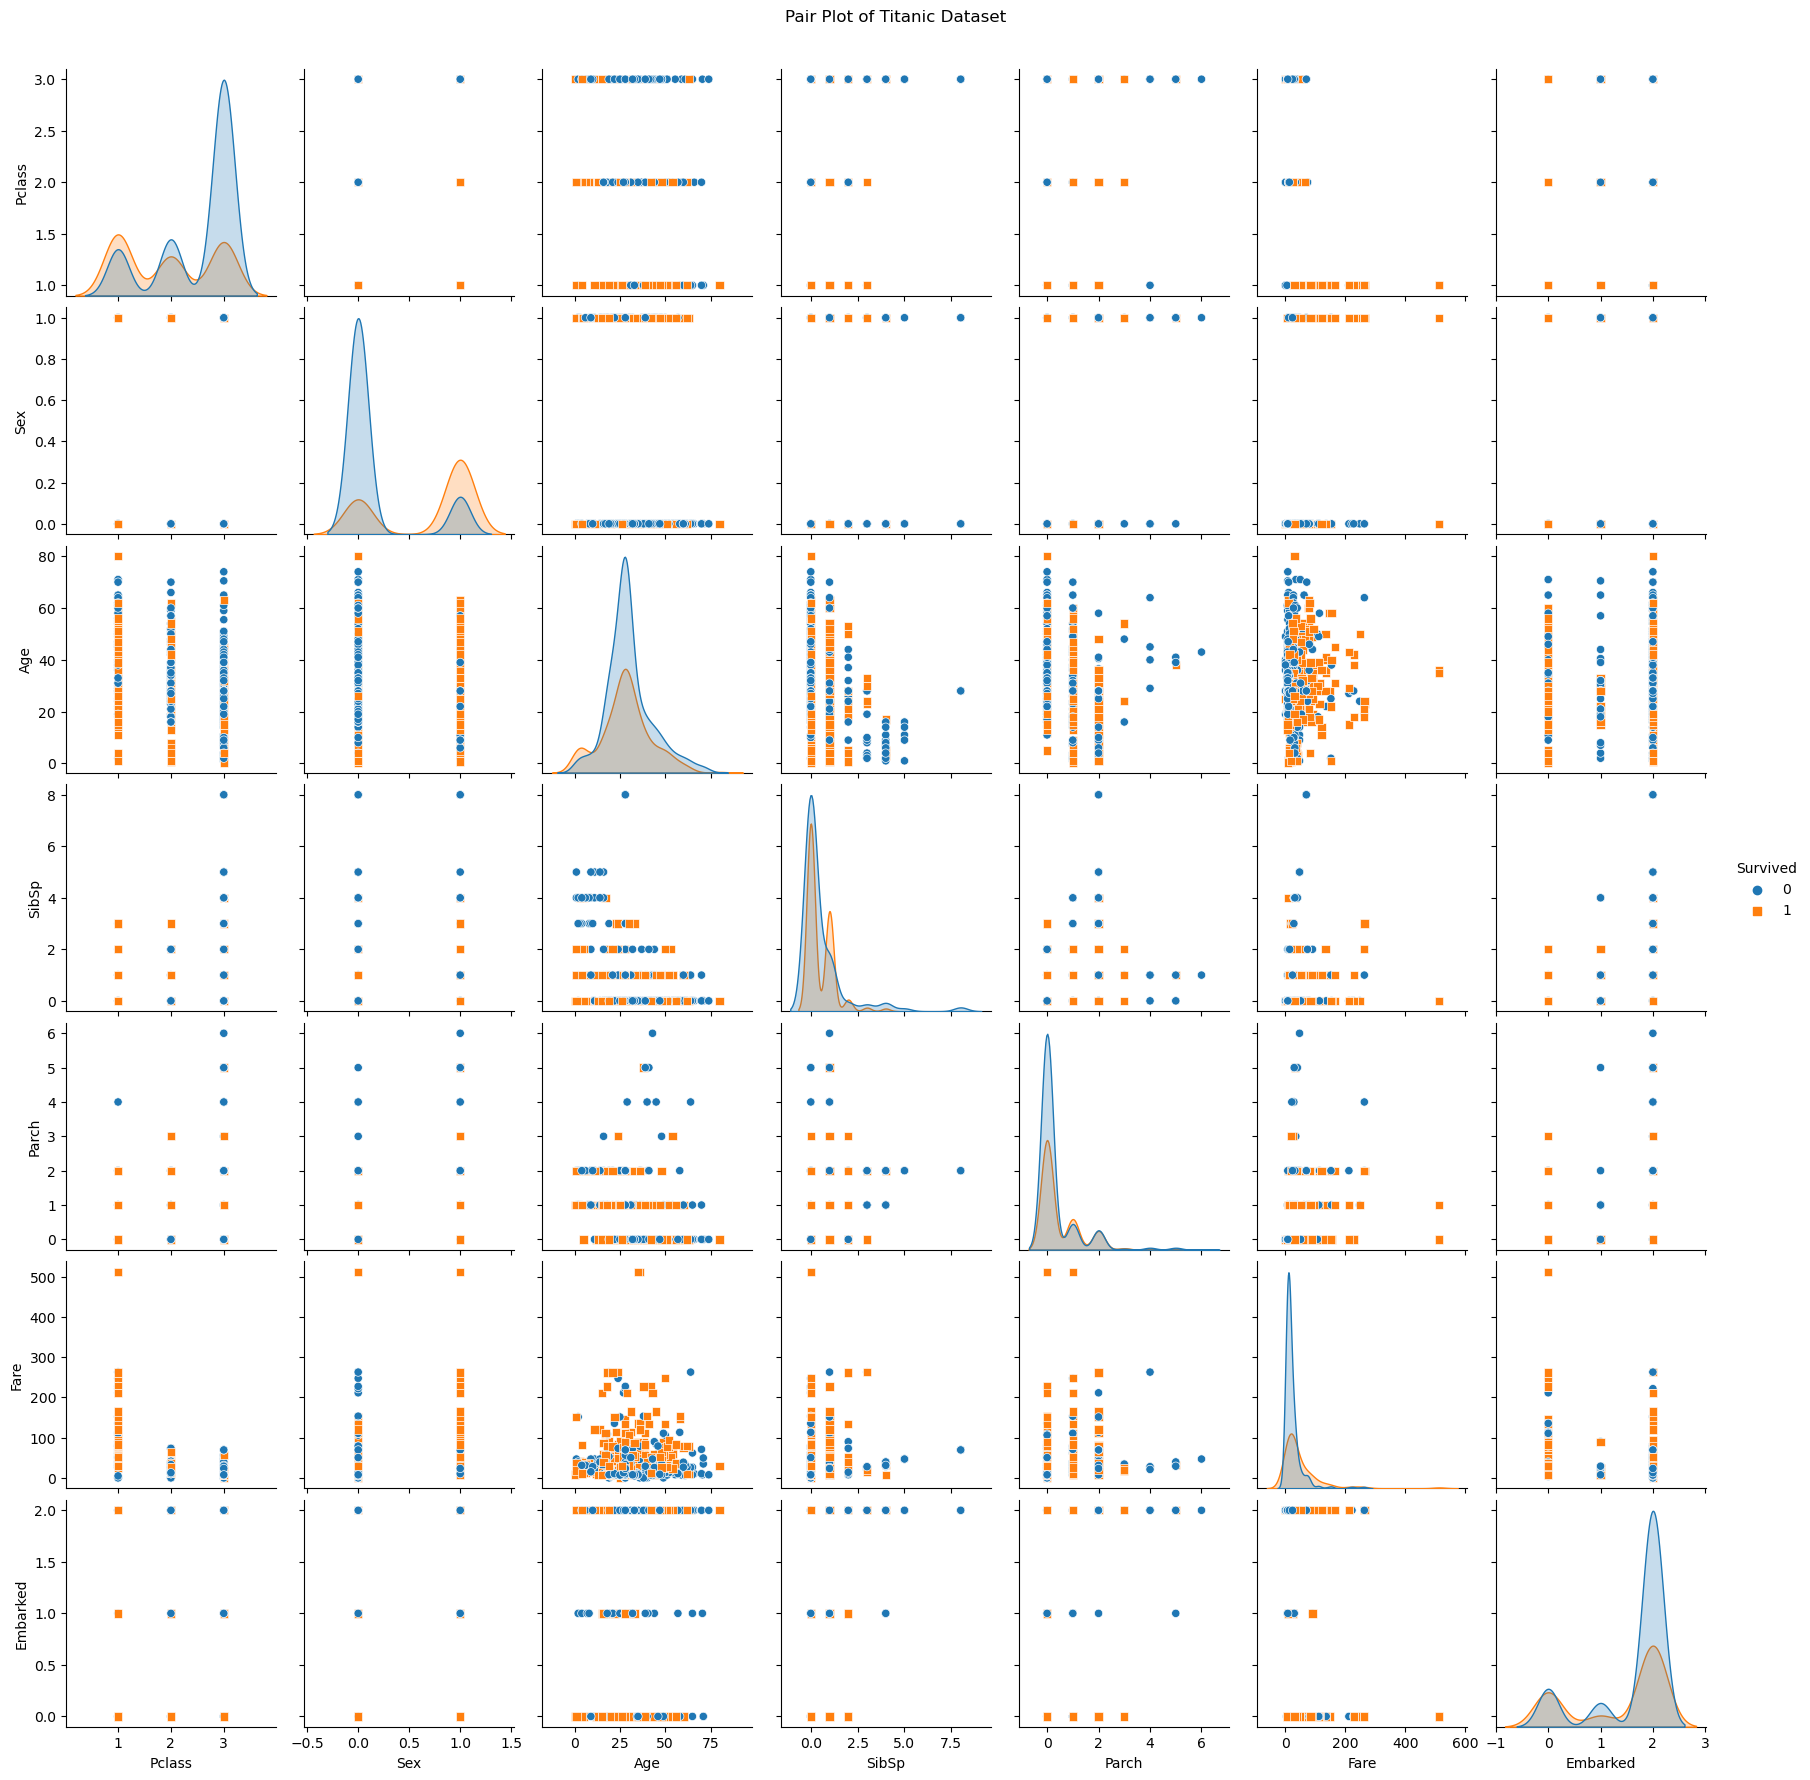

In [166]:
# PairPlot for Titanic Dataset
sb.pairplot(data, hue='Survived', markers=['o', 's'])
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)
plt.show()

### BoxPlot for Titanic Dataset

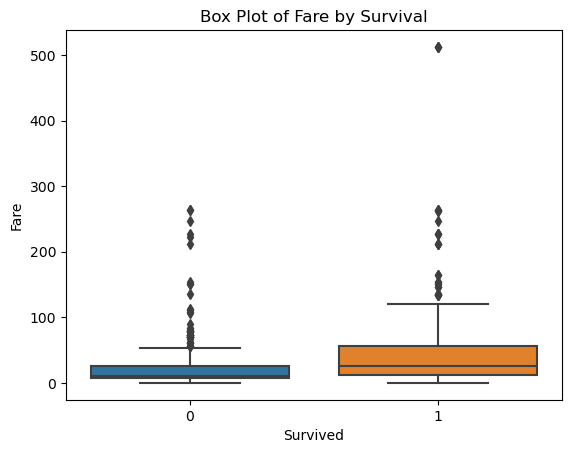

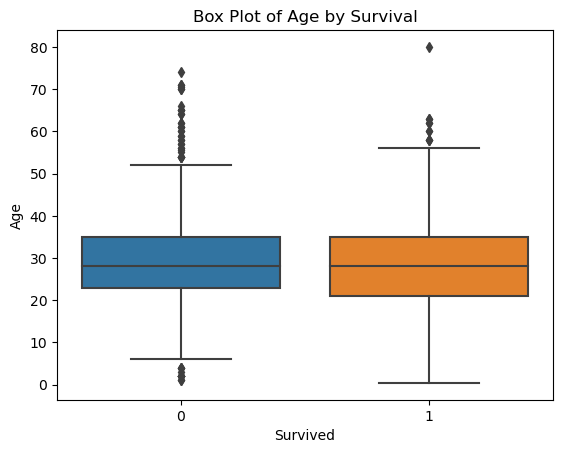

In [167]:
# BoxPlot for Titanic Dataset
sb.boxplot(x='Survived', y='Fare', data=data)
plt.title('Box Plot of Fare by Survival')
plt.show()

sb.boxplot(x='Survived', y='Age', data=data)
plt.title('Box Plot of Age by Survival')
plt.show()

### Scatter plot for Age vs Fare

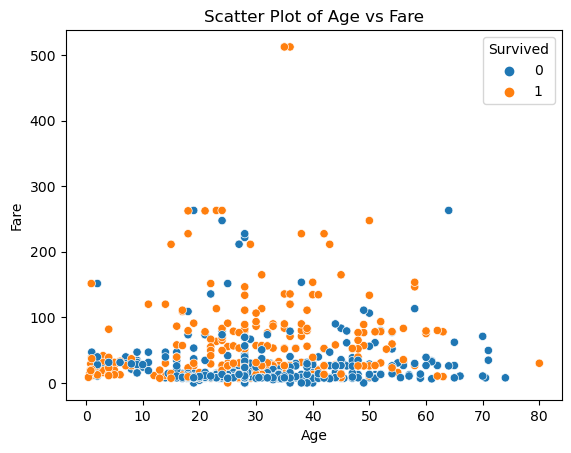

In [168]:
# Scatter plot for Age vs Fare
sb.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Scatter Plot of Age vs Fare')
plt.show()

## Data Splitting with Training and Testing

In [169]:
x = data.iloc[:, :-1]  # Features (all columns except 'Survived')
y = data['Survived']   # Target (Survived column)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Model Training and Evaluation

### Random Forest Classifier

In [170]:
rf = RandomForestClassifier()  # Initialize the Random Forest Classifier
rf.fit(x_train, y_train)  # Train the model
rf_pred = rf.predict(x_test)  # Make predictions on the test set

score_rf = accuracy_score(y_test, rf_pred)
conf_matrix_rf = confusion_matrix(y_test, rf_pred)  # Evaluate the model

print("Random Forest Accuracy:", score_rf)  # Print the results
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy: 1.0
Confusion Matrix:
[[110   0]
 [  0  69]]


### Decision Tree Classifier

In [171]:
dt = DecisionTreeClassifier()  # Initialize the Decision Tree Classifier
dt.fit(x_train, y_train)  # Train the model
dt_pred = dt.predict(x_test)  # Make predictions on the test set

score_dt = accuracy_score(y_test, dt_pred)
conf_matrix_dt = confusion_matrix(y_test, dt_pred)  # Evaluate the model

print("Decision Tree Accuracy:", score_dt)  # Print the results
print("Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree Accuracy: 1.0
Confusion Matrix:
[[110   0]
 [  0  69]]


### Logistic Regression

In [172]:
lr = LogisticRegression(max_iter=1000)  # Using Logistic Regression for Prediction
lr.fit(x_train, y_train)  # Train the model
lr_pred = lr.predict(x_test)  # Make predictions on the test set

score_lr = accuracy_score(lr_pred, y_test)
conf_matrix_lr = confusion_matrix(y_test, lr_pred)  # Evaluate the model

print("Logistic Regression Accuracy:", score_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

Logistic Regression Accuracy: 1.0
Confusion Matrix:
[[110   0]
 [  0  69]]


## Testing and Prediction of Titanic Survival

In [173]:
print("Welcome to the Titanic Survival Prediction Input!")

age = float(input("Enter Age: "))  # Get user input for age, fare, and other measurements
fare = float(input("Enter Fare: "))
pclass = int(input("Enter Pclass (1, 2, or 3): "))
sex = int(input("Enter Sex (0 for male, 1 for female): "))
sibsp = int(input("Enter SibSp: "))
parch = int(input("Enter Parch: "))
embarked = int(input("Enter Embarked (0 for C, 1 for Q, 2 for S): "))

print("\nYou entered the following values:")  # Display the input values
print(f"Age: {age}")
print(f"Fare: {fare}")
print(f"Pclass: {pclass}")
print(f"Sex: {sex}")
print(f"SibSp: {sibsp}")
print(f"Parch: {parch}")
print(f"Embarked: {embarked}")

prediction = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])  # Prediction
print(lr.predict(prediction))

import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Suppress warnings

# Conclusion
print("The Titanic survival prediction task demonstrates the application of machine learning techniques to classify passengers into survivors or non-survivors based on their attributes.")

Welcome to the Titanic Survival Prediction Input!
Enter Age: 27
Enter Fare: 11.1333
Enter Pclass (1, 2, or 3): 3
Enter Sex (0 for male, 1 for female): 1
Enter SibSp: 0
Enter Parch: 2
Enter Embarked (0 for C, 1 for Q, 2 for S): 2

You entered the following values:
Age: 27.0
Fare: 11.1333
Pclass: 3
Sex: 1
SibSp: 0
Parch: 2
Embarked: 2
[1]
The Titanic survival prediction task demonstrates the application of machine learning techniques to classify passengers into survivors or non-survivors based on their attributes.


## Conclusion:

In conclusion, the Titanic survival prediction task demonstrates the application of machine learning techniques to predict whether a passenger would survive the disaster based on various features. By using models like Random Forest, Decision Tree, and Logistic Regression, we can create classifiers capable of making accurate predictions on unseen data. This task highlights the importance of preprocessing, data visualization, and model evaluation in building reliable machine learning models.